# **Exercise 1: Sales Analysis for a Supermarket Chain**

1. Setup and Data Loading: Start by loading the data into a pandas DataFrame.
*   Import the necessary libraries (pandas as pd, matplotlib.pyplot as plt, and seaborn as sns).
*   Read the CSV fi le using pd.read_csv(). Store it in a DataFrame, e.g., df.
*   Print out the fi rst 5 rows using df.head() to preview the data and verify it loaded correctly.

In [1]:
#Import all req libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("supermarket_sales .csv")

In [4]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


2. Inspect the Data: Get basic information about the dataset to understand its structure.


*   Print the shape of the DataFrame to see how many rows and columns it contains.
*   Use df.info() to see the data types of each column and check for any missing values.
*   Use df.describe() to view summary statistics for numeric columns (count, mean, min, max, etc.).
*   Based on this initial inspection, note down any observations (for example, which columns are numeric vs categorical, whether any column has null values, etc.).

In [5]:
df.shape

(1000, 17)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [7]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [8]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.220360e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


**Observation :** Based on this initial inspection of the outcome of df.info() and df.describe(), following are the observations:
1. The df.shape output indicates the exact number of rows and columns.
2. df.info() shows the data type for each column which is in our case Invoice Id , Branch, city, Customer type, Gender, Product line, Date & Time are categorical data and all others are numerical data. It also indicates number of non-null values entries which in our case all entires are non-null and we confirmed that by call isnull() which says that there is no null values.
3. Next is df.describe() which provide summary statistics for numeric columns which include count, mean, standard deviation, minimum, maximum & quartiles.

3. Sales by Branch: Determine which branch has the highest total sales.
*   Use pandas grouping to calculate the total Total sales for each branch (hint: use df.groupby() on the branch column and sum the "Total" column).
*   Identify the branch with the greatest total sales sum.
*   Create a bar chart showing total sales for each branch. Label the x-axis with branch identifi ers (e.g., A, B, C) and the y-axis with the total sales amount. Give the chart a title like "Total Sales by Branch".
*   From the chart and values, briefl y note which branch is performing best in terms of revenue.

In [9]:
total_sales_branchwise = df.groupby("Branch").agg({"Total":"sum"})

In [10]:
print (total_sales_branchwise)

              Total
Branch             
A       106200.3705
B       106197.6720
C       110568.7065


In [11]:
highest_sales_branch = total_sales_branchwise.idxmax()
print(highest_sales_branch)

Total    C
dtype: object


In [12]:
#With above result the branch with the greatest total sales
#is branch C whose total sales is 110568.7065

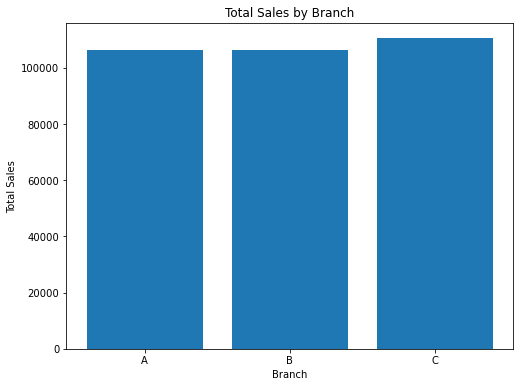

In [16]:
plt.figure(figsize=(8, 6))
plt.bar(total_sales_branchwise.index, total_sales_branchwise["Total"])
plt.xlabel("Branch")
plt.ylabel("Total Sales")
plt.title("Total Sales by Branch")
plt.show()

**Note** : Based on the chart and the calculated values, **Branch C** is performing best in terms of revenue.

4. Member vs Normal Customers: Analyze whether membership affects purchase amounts.
*   Calculate the average purchase total for Member customers vs Normal customers. (Group the data by "Customer Type" and fi nd the mean of the "Total" column.)
*   Create a bar chart to compare the average transaction amount for Members vs Normal customers.
*   Add appropriate labels and title (e.g., "Average Purchase Amount by Customer Type").
*  Observe the chart to see if members tend to spend more per transaction than non-members (or vice versa). Record any insight from this comparison.

In [17]:
Avg_purchaseTotal_CustType = df.groupby("Customer type").agg({"Total":"mean"})
print("Average purchase total for Member customers vs Normal customers: ",Avg_purchaseTotal_CustType)

Average purchase total for Member customers vs Normal customers:                      Total
Customer type            
Member         327.791305
Normal         318.122856


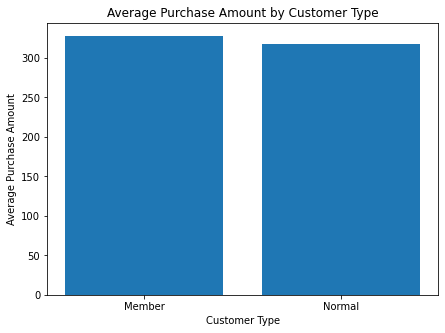

In [18]:
plt.figure(figsize=(7, 5))
plt.bar(Avg_purchaseTotal_CustType.index, Avg_purchaseTotal_CustType["Total"])
plt.xlabel("Customer Type")
plt.ylabel("Average Purchase Amount")
plt.title("Average Purchase Amount by Customer Type")
plt.show()

**Observation:** Based on the bar chart, it appears that Member customers tend to spend more per transaction on average than Normal customers.

5. Sales by Product Line: Find out which product categories are generating the most revenue.
*   Use grouping to sum up the Total sales for each "Product line". There are several product categories (e.g., Food & beverages, Fashion accessories, etc.).
*   Sort the results to see which product line has the highest total sales.
*   Create a bar chart of total sales by product line. Since product line names might be long, consider making the chart horizontal (switch x and y) for readability, or increase the fi gure size. Label the axes (product line and total sales) and add a title.
*   From the chart, identify the top-performing product category in terms of sales.

In [19]:
total_sales_productline = df.groupby("Product line").agg({"Total":"sum"})
print("Total sales for each 'Product line':")
print(total_sales_productline)


Total sales for each 'Product line':
                             Total
Product line                      
Electronic accessories  54337.5315
Fashion accessories     54305.8950
Food and beverages      56144.8440
Health and beauty       49193.7390
Home and lifestyle      53861.9130
Sports and travel       55122.8265


In [20]:
# Sort the results in descending order of 'Total' sales
sorted_total_sales_productline = total_sales_productline.sort_values(by="Total", ascending=False)
print("Sorted Order of Product line: ",sorted_total_sales_productline)


Sorted Order of Product line:                               Total
Product line                      
Food and beverages      56144.8440
Sports and travel       55122.8265
Electronic accessories  54337.5315
Fashion accessories     54305.8950
Home and lifestyle      53861.9130
Health and beauty       49193.7390


Above sorted order of Product line clearly show that Food and beverages has highest total sales.

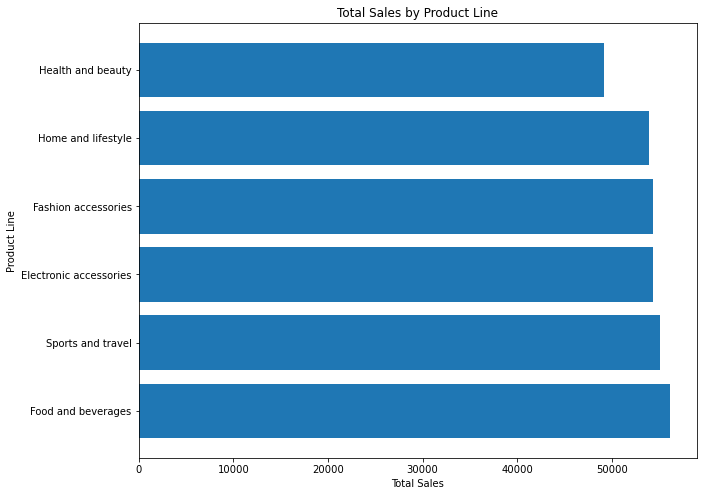

In [21]:
plt.figure(figsize=(10, 8))  # Increase figure size for better readability
plt.barh(sorted_total_sales_productline.index, sorted_total_sales_productline["Total"])
plt.xlabel("Total Sales")
plt.ylabel("Product Line")
plt.title("Total Sales by Product Line")
plt.show()

From the above chart, "Food and beverages" is the top-performing product category in terms of sales.

6. Customer Satisfaction Distribution: Examine the distribution of customer satisfaction ratings.
*   Look at the "Rating" column, which ranges from 1 to 10. Use a histogram to plot the distribution of ratings. (You can use plt.hist() or sns.histplot() on the "Rating" column.)
*   Set an appropriate number of bins (or let it auto-bin) and label the axes (Rating score on x-axis, Frequency on y-axis). Add a title like "Distribution of Customer Ratings".
*   Check if the ratings tend to be high, low, or varied. (For example, are most ratings around 7-9, or is it a uniform distribution?) Note any observation, such as if customers generally gave good ratings or if there’s a wide spread.


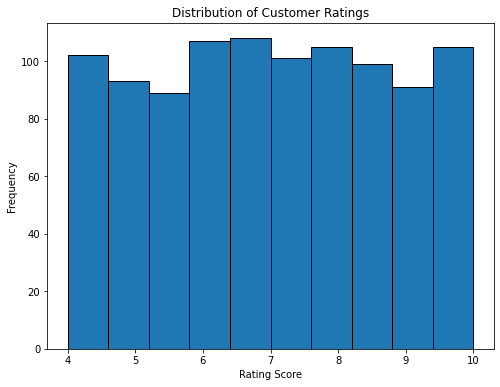

In [22]:
plt.figure(figsize=(8, 6))
plt.hist(df["Rating"], bins=10, edgecolor='black')
plt.xlabel("Rating Score")
plt.ylabel("Frequency")
plt.title("Distribution of Customer Ratings")
plt.show()

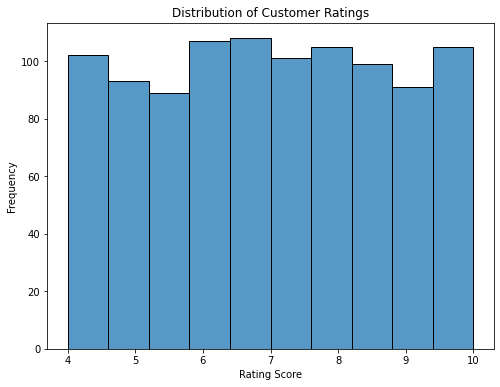

In [23]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x="Rating", bins=10, kde=False) # kde=False to not show the density curve
plt.xlabel("Rating Score")
plt.ylabel("Frequency")
plt.title("Distribution of Customer Ratings")
plt.show()

**Observation:** Based on the histogram of customer ratings, it appears that  ratings are relatively spread out across the 4-10 range, it suggests a more uniform distribution, meaning there's a wide spread of ratings with no strong tendency towards high or low scores This suggests that customers generally gave good ratings.

7. Summarize Findings: Conclude this exploration with a brief summary of your fi ndings for this dataset.
*  Write a short paragraph (3-5 sentences) highlighting key insights. For example, which branch had the highest sales, how member vs normal spending diff ered, which product line was best-selling, and anything interesting about customer ratings.
*  If there were any surprises or notable patterns in the data, mention them. This summary will be useful when you compile your portfolio project description.

# **Summary :** Based on the analysis of the supermarket sales data, Branch C emerged as the top-performing branch in terms of total revenue. We observed that Member customers tend to have a higher average purchase amount compared to Normal customers, suggesting a potential benefit to the membership program. Among the various product lines, Food and beverages generated the highest total sales, indicating its popularity with customers. Finally, the distribution of customer ratings shows a wide spread, with ratings relatively distributed across the 4-10 range, suggesting a varied but generally positive customer satisfaction level.